In [1]:
import yfinance as yf
from src.TimeSeries import TimeSeries
from src.TimeSeriesPlot import TimeSeriesPlot

In [2]:
# Descargar precios de MELI
meli = yf.download('MELI', start='2022-01-01')
dates = meli.index
meli_prices = meli['Close']['MELI']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
ts = TimeSeries(dates, meli_prices)

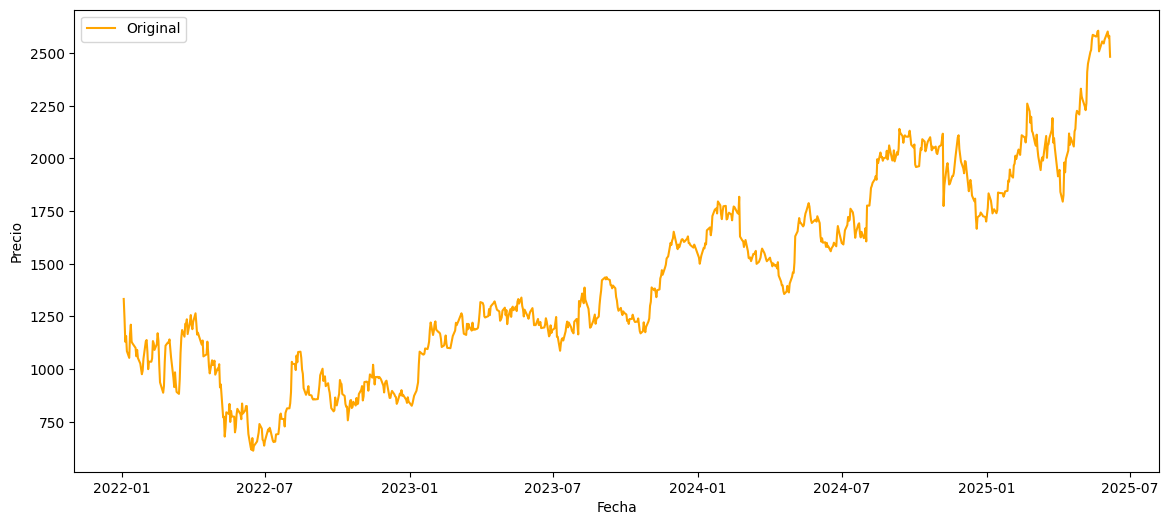

In [4]:
plot = TimeSeriesPlot(ts)
plot.addOriginal()
plot.show()

In [5]:
ts.is_stationary()

ADF Statistic: -0.34036215614374726
p-value: 0.9195901218755583

KPSS Statistic: 4.135281229964018
p-value: 0.01

Decisión: No estacionaria


/home/neville/GitHub/time-series-analysis/src/TimeSeries.py:25: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(self.values, regression='c', nlags='auto')


False

In [6]:
ts_detrended, _ = ts.detrend()
ts_detrended.is_stationary()

ADF Statistic: -4.028082269573857
p-value: 0.0012703962607007561

KPSS Statistic: 0.3276175818056707
p-value: 0.1

Decisión: Estacionaria


/home/neville/GitHub/time-series-analysis/src/TimeSeries.py:25: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(self.values, regression='c', nlags='auto')


True

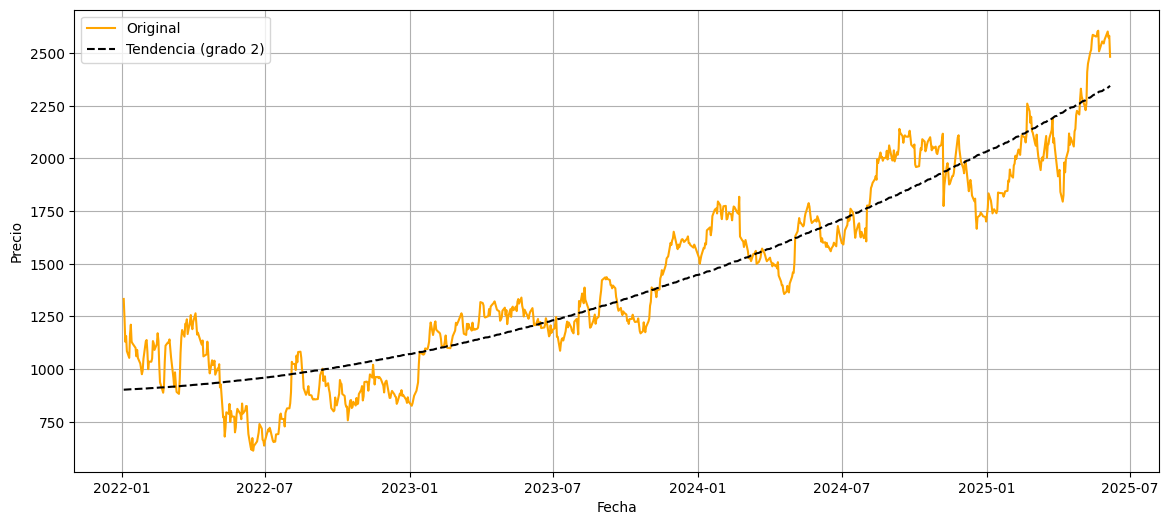

In [7]:
grado_de_tendencia = 2

plot = TimeSeriesPlot(ts)
plot.addOriginal()
plot.addTendency(grado_de_tendencia)
plot.addGrid()
plot.show()

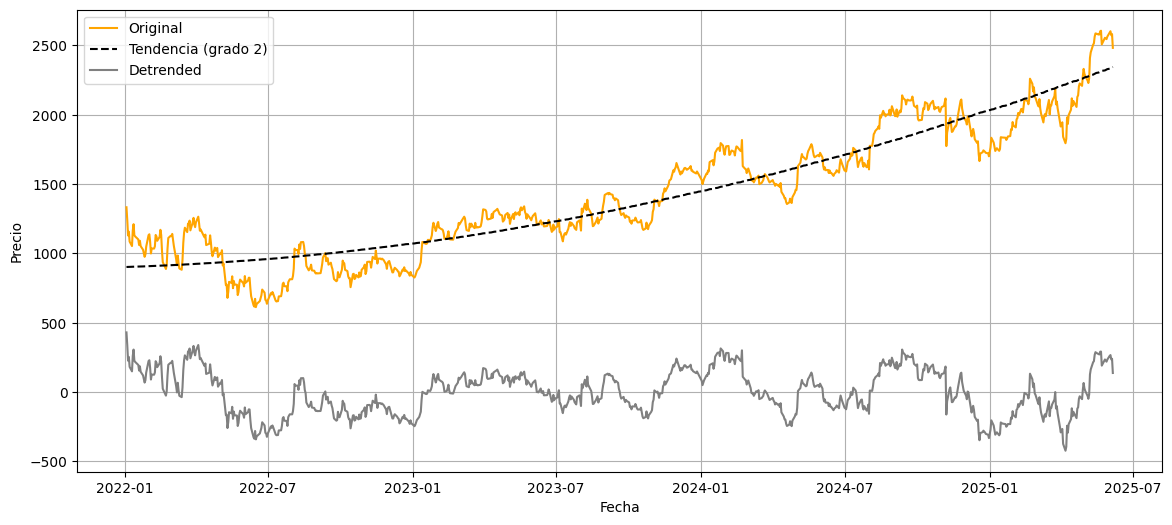

In [8]:
plot = TimeSeriesPlot(ts)
plot.addOriginal()
plot.addTendency(grado_de_tendencia)
plot.addGrid()
plot.addDetrended(grado_de_tendencia)
plot.show()